In [37]:
from __future__ import absolute_import,division,print_function,unicode_literals
import tensorflow as tf 
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt 
print(tf.__version__)

2.0.0


In [38]:
fashion_minst = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_minst.load_data()

In [39]:
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)


In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(train_labels)
        

60000

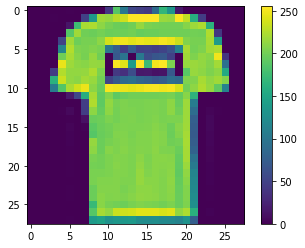

In [41]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

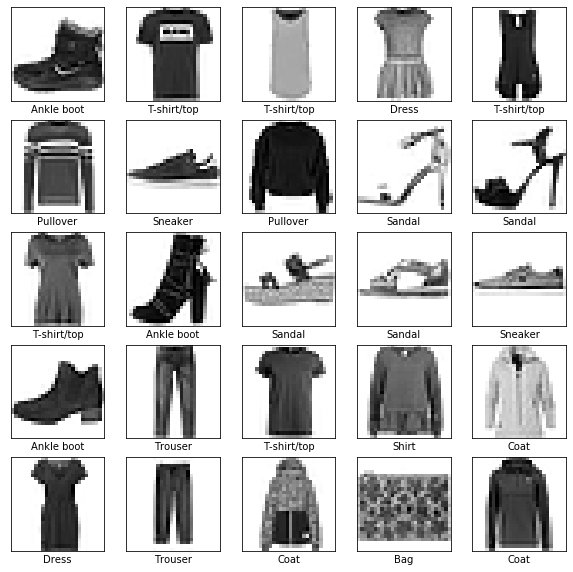

In [42]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [47]:

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.5002 - accuracy: 0.8237
Epoch 2/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3796 - accuracy: 0.8630
Epoch 3/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.3376 - accuracy: 0.8768
Epoch 4/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3114 - accuracy: 0.8860
Epoch 5/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2934 - accuracy: 0.8922
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2797 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2675 - accuracy: 0.9014
Epoch 8/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2580 - accuracy: 0.9037
Epoch 9/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2471 - accuracy: 0.9089
Ep

In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n Test accuracy:', test_acc)

10000/1 - 1s - loss: 0.2405 - accuracy: 0.8806

 Test accuracy: 0.8806


In [49]:
predictions = model.predict(test_images)
predictions[0]
print("predict value:", np.argmax(predictions[0]))
print("real value:",test_labels[0])

predict value: 9
real value: 9


In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

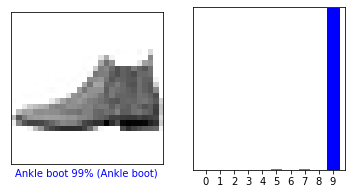

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

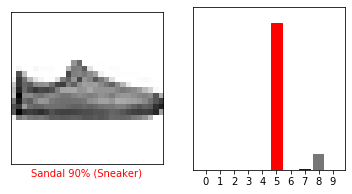

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

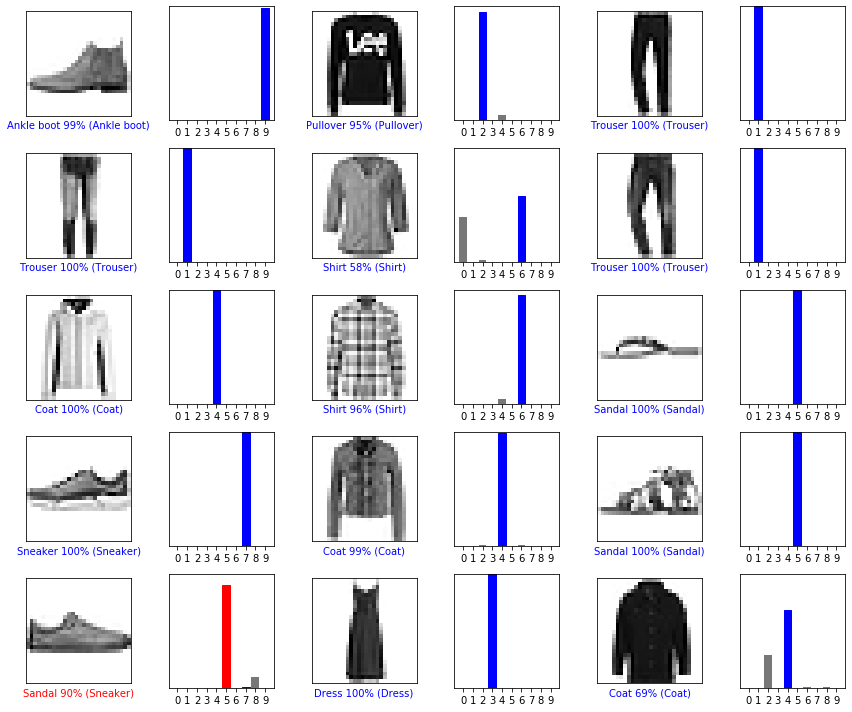

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [54]:
img = test_images[1]

print(img.shape)

(28, 28)


In [55]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.0080907e-04 5.0042387e-11 9.4656461e-01 4.3050238e-10 5.0244678e-02
  1.5072711e-09 2.2898302e-03 2.6553199e-18 2.5889477e-09 2.5493493e-13]]


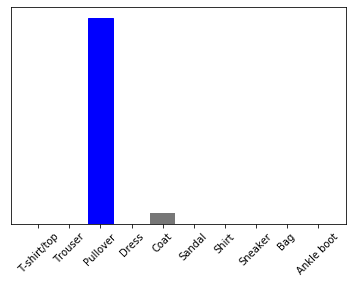

In [57]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [58]:
np.argmax(predictions_single[0])


2